# cancer-drug-resistance

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="cancer-drug-resistance")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anubratadas/cancer-drug-resistance" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anubratadas/cancer-drug-resistance


'https://jovian.ai/anubratadas/cancer-drug-resistance'

In [4]:
import requests
from bs4 import BeautifulSoup as bs 
import time
import xml.etree.ElementTree as ET
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import json

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

##### https://www.anticancerfund.org/en/cancerdrugs-db. the list of drugs have been obtained from this site

In [6]:
with open('cancerdrugsdb.txt','r') as dbf:
    data=dbf.readlines()
    db_comp=(line for line in data)
    
with open('revised_db.txt','w') as revdbf:    
    count=0
    for line in db_comp:
        try:
            count=count+1 # the seperator had to be '|' as all other seperators could not segment 
            revdbf.writelines(line.split("\t")[0]+"|"+line.split("\t")[7]+"|"+line.split("\t")[10]+"|"+line.split("\t")[11]+"\n")
        except IndexError as e:
            print(line)        

In [6]:
drugs_table=pd.read_csv('revised_db.txt',sep="|",header=0)

In [7]:
drugs_table.head()

,Product,DrugBank ID,Indications,Targets
0,Abemaciclib,"<a href=""https://go.drugbank.com/drugs/DB12001...",Advanced Breast Cancer; Metastatic Breast Cancer,CDK6; CDK4; CCND3; CDKN2A; CCND2; SMARCA4
1,Abiraterone,"<a href=""https://go.drugbank.com/drugs/DB05812...",Metastatic Castration Resistant Prostate Cancer,CYP17A1; DSE; TSPYL1
2,Acalabrutinib,"<a href=""https://go.drugbank.com/drugs/DB11703...",Chronic Lymphocytic Leukaemia (CLL); Mantle Ce...,BTK; TEC; TXK; BMX
3,Aclarubicin,"<a href=""https://go.drugbank.com/drugs/DB11617...",NaN,SMN1; TOP2B; CSF2
4,Afatinib,"<a href=""https://go.drugbank.com/drugs/DB08916...",Metastatic Non-Small Cell Lung Cancer; Refract...,EGFR; ERBB2; ERBB4; KRAS; EML4; NRG1; NRAS; ERBB3


In [9]:
drugs_list=drugs_table.Product.to_list()

In [10]:
drug_resistance_list=[drug+" AND resistance AND mutations" for drug in drugs_list]

In [11]:
# from PMC Database
url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi" # base url
def get_values(): 
    
    count_dict={"drug":[],"records":[]}
    count_dict['drug']=drugs_list # populate the terms in the dictionary        
    response_lst=[]
    for drug in drug_resistance_list:
        time.sleep(1)
        try:
            #print(str(drug))
            payload={"db":"pmc","term":drug,"retype":"count","retmax":10000,"email":"anubratadas@gmail.com","api_key":"9577c7078191e23dfdd5015746af31abf708" } # parameters
            response=requests.get(url,params=payload) # response object
            tree=ET.fromstring(response.content) # tree obtained directly from response.content using fromstring
            count=tree.find('Count').text
            #print(count)
            response_lst.append(count)                
        except error:
            print("error",error)  
    count_dict["records"]=response_lst   
    #mutation_dict= {"term":term,str(db):response_lst}    
    return  count_dict # return count of listings
                   
count_dict=get_values()

In [12]:
drug_resistance_records=pd.DataFrame(count_dict)

In [13]:
drug_resistance_records['records']=drug_resistance_records.records.map(lambda x:int(x))

In [14]:
drug_resistance_records.head()

,drug,records
0,Abemaciclib,1063
1,Abiraterone,2752
2,Acalabrutinib,420
3,Aclarubicin,203
4,Afatinib,4872


In [15]:
drug_resistance_records.to_csv("drug_resistance_records.csv",header=True,index=False)

In [59]:
top_drugs_resistance=pd.read_csv("drug_resistance_records.csv").sort_values('records',ascending=False).head(n=20)

In [63]:
top_drugs_resistance_list=top_drugs_resistance['drug'].to_list()

In [124]:
drr_plot=drug_resistance_records[drug_resistance_records.records>=10000]

##### drugs well documented for resistance

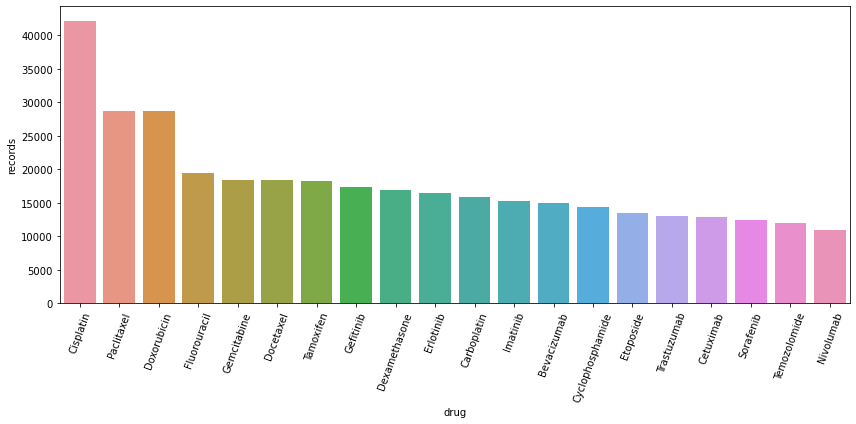

In [60]:
plt.figure(figsize=(12, 6))
plt.title('')
sns.barplot(data=top_drugs_resistance,x='drug',y='records');
plt.xticks(rotation=70)
plt.tight_layout()

##### drugs with very few records of resistance

In [126]:
drr_plot_2=drug_resistance_records[drug_resistance_records.records<=300]

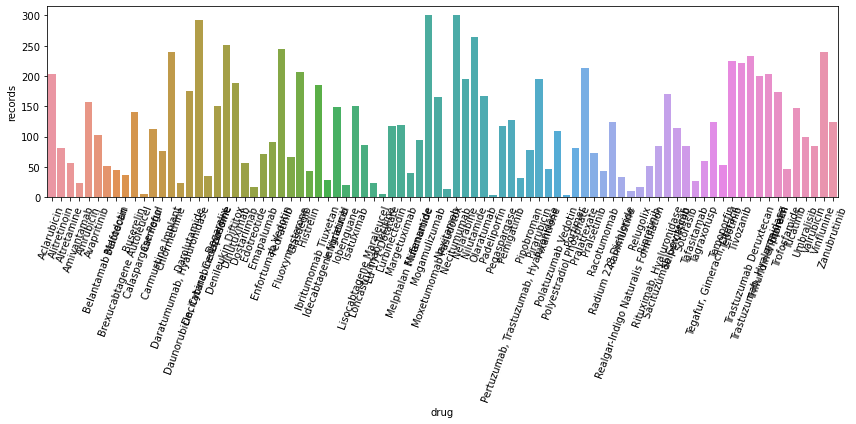

In [127]:
plt.figure(figsize=(12, 6))
plt.title('')
sns.barplot(data=drr_plot_2,x='drug',y='records');
plt.xticks(rotation=70)
plt.tight_layout()

<AxesSubplot:xlabel='records'>

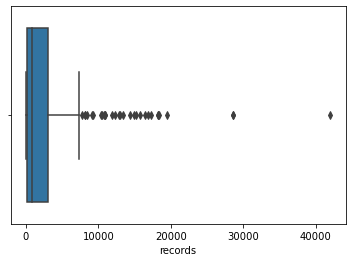

In [123]:
sns.boxplot(data=drug_resistance_records,x='records')

In [61]:
drugs_table

,Product,DrugBank ID,Indications,Targets
0,Abemaciclib,"<a href=""https://go.drugbank.com/drugs/DB12001...",Advanced Breast Cancer; Metastatic Breast Cancer,CDK6; CDK4; CCND3; CDKN2A; CCND2; SMARCA4
1,Abiraterone,"<a href=""https://go.drugbank.com/drugs/DB05812...",Metastatic Castration Resistant Prostate Cancer,CYP17A1; DSE; TSPYL1
2,Acalabrutinib,"<a href=""https://go.drugbank.com/drugs/DB11703...",Chronic Lymphocytic Leukaemia (CLL); Mantle Ce...,BTK; TEC; TXK; BMX
3,Aclarubicin,"<a href=""https://go.drugbank.com/drugs/DB11617...",NaN,SMN1; TOP2B; CSF2
4,Afatinib,"<a href=""https://go.drugbank.com/drugs/DB08916...",Metastatic Non-Small Cell Lung Cancer; Refract...,EGFR; ERBB2; ERBB4; KRAS; EML4; NRG1; NRAS; ERBB3
5,Aflibercept,"<a href=""https://go.drugbank.com/drugs/DB08885...",Metastatic Colorectal Cancer (MCRC),VEGFA; VEGFB; PGF; PIGF; VEGFC
6,Aldesleukin,"<a href=""https://go.drugbank.com/drugs/DB00041...",High Risk Neuroblastoma; Metastatic Melanoma; ...,IL2RG; IL2RB; IL2RA; IL2
7,Alectinib,"<a href=""https://go.drugbank.com/drugs/DB11363...","Refractory, metastatic Non small cell lung cancer",ALK; EML4; NPM1; CDKN2A; SMAD4; RET
8,Alemtuzumab,"<a href=""https://go.drugbank.com/drugs/DB00087...",B-Cell Chronic Lymphocytic Leukemia; T-Cell Pr...,CD52; FCGR3B; FCGR2A; FCGR2B; FCGR3A; FCGR1A; ...
9,Alitretinoin,"<a href=""https://go.drugbank.com/drugs/DB00523...",NaN,RXRG; VKORC1; RARA; RXRA; RXRB; RARB; RARG; CY...


In [8]:
targets=drugs_table['Targets'].apply(lambda x:x.split(";") if isinstance(x,str) else str(x)).tolist()

In [40]:

for i in range(drugs_table.shape[0]):
    row_pdt = drugs_table.loc[i,'Product']
    row_tgt=drugs_table.loc[i,'Targets']
    if isinstance(row_tgt,str):
        row_tgt_lst = row_tgt.split(";")
        for tgt in row_tgt_lst:
            print(row_pdt,tgt)
    else:
        print(str(row_tgt))    
        

Abemaciclib CDK6
Abemaciclib  CDK4
Abemaciclib  CCND3
Abemaciclib  CDKN2A
Abemaciclib  CCND2
Abemaciclib  SMARCA4
Abiraterone CYP17A1
Abiraterone  DSE
Abiraterone  TSPYL1
Acalabrutinib BTK
Acalabrutinib  TEC
Acalabrutinib  TXK
Acalabrutinib  BMX
Aclarubicin SMN1
Aclarubicin  TOP2B
Aclarubicin  CSF2
Afatinib EGFR
Afatinib  ERBB2
Afatinib  ERBB4
Afatinib  KRAS
Afatinib  EML4
Afatinib  NRG1
Afatinib  NRAS
Afatinib  ERBB3
Aflibercept VEGFA
Aflibercept  VEGFB
Aflibercept  PGF
Aflibercept  PIGF
Aflibercept  VEGFC
Aldesleukin IL2RG
Aldesleukin  IL2RB
Aldesleukin  IL2RA
Aldesleukin  IL2
Alectinib ALK
Alectinib  EML4
Alectinib  NPM1
Alectinib  CDKN2A
Alectinib  SMAD4
Alectinib  RET
Alemtuzumab CD52
Alemtuzumab  FCGR3B
Alemtuzumab  FCGR2A
Alemtuzumab  FCGR2B
Alemtuzumab  FCGR3A
Alemtuzumab  FCGR1A
Alemtuzumab  FCGR2C
Alemtuzumab  CXCL12
Alitretinoin RXRG
Alitretinoin  VKORC1
Alitretinoin  RARA
Alitretinoin  RXRA
Alitretinoin  RXRB
Alitretinoin  RARB
Alitretinoin  RARG
Alitretinoin  CYP26C1
Alitr

Midostaurin  PRKCA
Midostaurin  PRKCH
Midostaurin  PRKD1
Midostaurin  FLT3
Midostaurin  ETV6
Midostaurin  NPM1
Midostaurin  STK32B
Mifamurtide TLR4
Mifamurtide  NOD2
Mitomycin BGLAP
Mitomycin  PALB2
Mitomycin  FANCC
Mitomycin  VWF
Mitoxantrone UGT1A5
Mitoxantrone  C10ORF67
Mitoxantrone  GALNT14
Mitoxantrone  RPSA
Mogamulizumab CCR4
Moxetumomab Pasudotox CD22
Moxetumomab Pasudotox  EEF2
Nab-Paclitaxel TUBB1
Nab-Paclitaxel  STMN1
Nab-Paclitaxel  FGD4
Nab-Paclitaxel  PDCD4
Nab-Paclitaxel  DSCAM
Nab-Paclitaxel  EPHA5
Nab-Paclitaxel  MAP4
Nab-Paclitaxel  EIF4EBP1
Nab-Paclitaxel  MYB
Nab-Paclitaxel  TUBB4A
Nab-Paclitaxel  TUBA3C
Nab-Paclitaxel  TLE3
Nab-Paclitaxel  SPATA5
Nab-Paclitaxel  NFE2
Nab-Paclitaxel  MAD1L1
Nab-Paclitaxel  SOX10
Nab-Paclitaxel  MAP2
Nab-Paclitaxel  TRIM5
Nab-Paclitaxel  ABCC10
nan
Necitumumab EGFR
Necitumumab  KRAS
Nelarabine POLA1
Neratinib EGFR
Neratinib  ERBB2
Neratinib  HERC2
Nilotinib ABL1
Nilotinib  DDR1
Nilotinib  KIT
Nilotinib  DDR2
Nilotinib  NF1
Nilotinib  

In [16]:
dt_t=drugs_table.loc[0,'Targets']
product=drugs_table.iloc[0,0]
dt_t=dt_t.split(";")
len(dt_t)

6

In [18]:
print([(product,target)for target in dt_t])

[('Abemaciclib', 'CDK6'), ('Abemaciclib', ' CDK4'), ('Abemaciclib', ' CCND3'), ('Abemaciclib', ' CDKN2A'), ('Abemaciclib', ' CCND2'), ('Abemaciclib', ' SMARCA4')]


In [27]:
len(targets)

281

In [40]:
products=drugs_table.Product.tolist()

In [26]:
len(products)

281

In [46]:
lst=[]
for target_list in targets:
    if isinstance(target_list,(list)):
        for gene in target_list:
            lst.append(gene)
len(lst)

2046

In [61]:
for product,targetList in zip(products,targets):
    for target in targetList:
        target=target.strip(" ")
        if target=='POLE':
            print(product)

Cladribine
Clofarabine
Cytarabine
Pembrolizumab


In [44]:
from collections import Counter

In [47]:
targets_from_targetlist=Counter(lst)

In [49]:
common_targets=targets_from_targetlist.most_common()

In [50]:
common_targets[:3]

[('EGFR', 10), (' NRAS', 10), (' CDKN2A', 9)]

In [117]:
genes=[]
counts=[]
for gene,count in common_targets:
    genes.append(gene)
    counts.append(count)
gene_dict={"genes":genes,"count":counts}    
    

In [118]:
pd.DataFrame(gene_dict)

,genes,count
0,EGFR,10
1,NRAS,10
2,CDKN2A,9
3,KIT,9
4,BRAF,9
5,KRAS,8
6,ERBB3,8
7,NPM1,8
8,CXCL12,8
9,ALK,8


In [9]:
drugs_table.head()

,Product,DrugBank ID,Indications,Targets
0,Abemaciclib,"<a href=""https://go.drugbank.com/drugs/DB12001...",Advanced Breast Cancer; Metastatic Breast Cancer,CDK6; CDK4; CCND3; CDKN2A; CCND2; SMARCA4
1,Abiraterone,"<a href=""https://go.drugbank.com/drugs/DB05812...",Metastatic Castration Resistant Prostate Cancer,CYP17A1; DSE; TSPYL1
2,Acalabrutinib,"<a href=""https://go.drugbank.com/drugs/DB11703...",Chronic Lymphocytic Leukaemia (CLL); Mantle Ce...,BTK; TEC; TXK; BMX
3,Aclarubicin,"<a href=""https://go.drugbank.com/drugs/DB11617...",NaN,SMN1; TOP2B; CSF2
4,Afatinib,"<a href=""https://go.drugbank.com/drugs/DB08916...",Metastatic Non-Small Cell Lung Cancer; Refract...,EGFR; ERBB2; ERBB4; KRAS; EML4; NRG1; NRAS; ERBB3


In [ ]:
# from PMC Database
url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi" # base url
def get_efetch_uids(item): 
    uid_lst=[] # list object to collect the udds generated by Esearch    
    try:
        payload={"db":"pmc","term":item,"retype":"count","retmax":1000,"email":"anubratadas@gmail.com","api_key":"9577c7078191e23dfdd5015746af31abf708" } # parameters
        response=requests.get(url,params=payload) # response object
        response.raise_for_status()
        root=ET.fromstring(response.content) # tree obtained directly from response.content using fromstring
        id_list=root.find('IdList')   
        return id_list
    except requests.exceptions.HTTPError as err:
        raise SystemExit(err)
    except requests.exceptions.TooManyRedirects:
        print("please try a different URL")
            
def call_efetch():
    dict_drug={'drug':drugs_list,'uid':}
    uid_list=[]
    for drug in drugs_list:        
        time.sleep(1)
        id_list=get_efetch_uids(drug)        
        for id_num in id_list:
            uid_list.append(id_num.text)
    uid=",".join(uid_list) 
    print(f' {len(uid_list)} records retrieved')
    return uid
uid=call_efetch()

In [103]:
id_list_ref_string=",".join(id_list_references) # the id list is converted to a string object 

In [107]:
# Esummary with the string variable from Esearch passed to id parameter of Esummary
# since we have more than 200 records we have to use post
url_summ="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?"
payload={"db":"pmc","id":id_list_ref_string,"email":"anubratadas@gmail.com","api_key":"9577c7078191e23dfdd5015746af31abf708" } 
response_esumm_uid=requests.get(url_summ,params=payload) # response object
print(response_esumm_uid.status_code)
esummary_root_et=ET.fromstring(response_esumm_uid.content) # get content
docsum=esummary_root_et.findall('DocSum')                  # find document

414


ParseError: no element found: line 1, column 0 (<string>)

In [115]:
# this function creates sublists of 200 entries each for getting esummary records

def chunk_list(id_list):
    master_list_=[]
    add_list=[]  # create a temporary list variable
    a=200 # select the chunk size
    while len(id_list)>=0:  # check that input list is nonzero
        add_list=id_list[:a]   # append the first 200 entries from input to the temporary list variable
        del id_list[:a]        # delete the entries transferred to the temporary list from the input list   
        master_list_.append(add_list)    
        if len(id_list)<=0:
            break   
    return master_list_         
master_list=chunk_list(id_list_references)

In [126]:
len(master_list[2])

135

In [138]:
# this code snippet will change the UIDs in the sublist back into strings for searching with esummary as a parameter
def uid_string_convert(master_list):
    uid_string_list=[]
    for sublist in master_list:
        str_uid=",".join(sublist)
        uid_string_list.append(str_uid)
    print("uid_str_list",len(uid_string_list))
    return uid_string_list


def get_summary(master_list):
    uid_string_list=uid_string_convert(master_list)
    docsum_list=[]
    for uid_string in uid_string_list:          
        url_summ="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?"
        payload={"db":"pmc","id":uid_string,"email":"anubratadas@gmail.com","api_key":"9577c7078191e23dfdd5015746af31abf708" } 
        time.sleep(1)                                              # server throttle
        response_esumm_uid=requests.get(url_summ,params=payload)   # response object
        esummary_root_et=ET.fromstring(response_esumm_uid.content) # get content
        docsum=esummary_root_et.findall('DocSum')                  # find document
        docsum_list.append(docsum) 
    return docsum_list

def parse_docsum(master_list):
    title_dict={"uid":[],"title":[]}
    title_list=[]
    uid_list=[]
    docsum_list=get_summary(master_list)
    for docsum in docsum_list:
        for entry in docsum:
            id_=entry.find('Id')
            #print(id.text)
            uid_list.append(id_.text)
            title=entry.find('Item[@Name="Title"]')
            #print(title.text)
            title_list.append(title.text)
    title_dict["title"]=title_list
    title_dict["uid"]=uid_list
    return title_dict

title_dict=parse_docsum(master_list)
search_title=pd.DataFrame(title_dict)
search_title_csv=search_title.to_csv("cancer-drug-resistance-mutations.csv")

uid_str_list 3


In [7]:
search_title.shape

NameError: name 'search_title' is not defined

In [8]:
#https://webs.iiitd.edu.in/raghava/cancerdr/mut.php   drug mutation site
response1=requests.get('https://webs.iiitd.edu.in/raghava/cancerdr/mut.php')

In [10]:
raghava_mutations=response1.text

In [6]:
with open('bhargava mutations.html', 'a', encoding="utf-8") as file:
    file.write(response1.text) 

NameError: name 'response1' is not defined

In [6]:
with open('raghava mutations.html', 'r', encoding="utf-8") as file:
    data=file.read()

In [7]:
data[:10]

'<!DOCTYPE '

In [8]:
soup=bs(raghava_mutations,'html.parser')

NameError: name 'raghava_mutations' is not defined

In [9]:
soup=bs(data,'html.parser')

In [10]:
table = soup.find_all('table', {'id':'tableTwo'})
#print(table)

In [11]:
soup_row=table[0].find_all('tr')

In [12]:
len(soup_row)

118

In [13]:
master_lst=[]
entry_lst=[]
for row in soup_row:
    for sibling in row.next_siblings:        
        if hasattr(sibling,'bs4.element.NavigableString'):            
            entry=sibling.find_all('td')  
            
            for sub_item in entry:
                entry_lst.append(sub_item.get_text().strip())
        master_lst.append(entry_lst)  
master_lst=[item for item in master_lst if len(item)>0]        
#print(master_lst)

In [14]:
master_lst=master_lst[0]

In [18]:
master_lst[:10]

['ABL2', '5', 'AKT1', '7', 'AKT2', '5', 'AKT3', '8', 'ALK', '39']

In [20]:
#[int(item) for item in master_lst if item.isdigit()]

In [15]:
master_genes=[item for item in master_lst if not item.isdigit()]

In [16]:
master_genes_set=set(master_genes)

In [17]:
fh=open('master_gene_set','w')
for gene in master_genes_set:
    fh.write(gene + ",")
fh.close()        

In [94]:
gene_list=[]
for row in soup_row[2:-1]:
    genes=row.find_all('td',{"align":"left"})
    gene_list.append(genes[0].get_text().strip("\t"))

In [100]:
gene_mutation_list=[]
for row in soup_row[2:-1]:
    genes=row.find_all('td',{"align":"right"})
    gene_mutation_list.append(int(genes[0].get_text().strip("\t")))

In [101]:
raghava_mutations=pd.DataFrame({"gene":gene_list,"mutations":gene_mutation_list})

In [103]:
raghava_mutations.shape

(115, 2)

In [102]:
raghava_mutations.sort_values("mutations",ascending=False)

,gene,mutations
7,ATM,53
66,PDGFRA,41
47,KDR,40
24,EGFR,39
5,ALK,39
28,FLT1,39
60,MTOR,38
87,PRKDC,34
69,PIK3CA,30
13,BRAF,30


In [104]:
raghava_mutations.to_csv("raghava_mutations.csv",header=True,index=False)

### The COSMIC database has the list of mutations corresponding to Drugs and Genes

In [5]:
with open('resMut.tsv','r') as fh:
  data=fh.readlines()

In [6]:
data[:5]

['Sample Name\tSample ID\tGene Name\tTranscript\tCensus Gene\tDrug Name\tMUTATION_ID\tGENOMIC_MUTATION_ID\tLEGACY_MUTATION_ID\tAA Mutation\tCDS Mutation\tPrimary Tissue\tTissue Subtype 1\tTissue Subtype 2\tHistology\tHistology Subtype 1\tHistology Subtype 2\tPubmed Id\tCGP Study\tSomatic Status\tSample Type\tZygosity\tGenome Coordinates (GRCh38)\tTier\tHGVSP\tHGVSC\tHGVSG\n',
 '3\t1330179\tKRAS_ENST00000556131\tENST00000556131.1\tNo\tCetuximab\t153544881\tCOSV55497388\tCOSM532\tp.G13D\tc.38G>A\tlarge_intestine\tcolon\ttransverse\tcarcinoma\tadenocarcinoma\tNS\t20361188\t\tPreviously Reported\tTumour Sample\tUnknown\t12:25245347..25245347\t\tENSP00000451856.1:p.Gly13Asp\tENST00000556131.1:c.38G>A\t12:g.25245347C>T\n',
 'RPC-9\t1083085\tEGFR_ENST00000455089\tENST00000455089.5\tNo\tGefitinib\t127653906\tCOSV51765492\tCOSM6240\tp.T745M\tc.2234C>T\tlung\tNS\tNS\tcarcinoma\tadenocarcinoma\tNS\t17699786\t\tPreviously Reported\tCultured\tHeterozygous\t7:55181378..55181378\t\tENSP00000415559.1:

In [41]:
resistance_genes=pd.read_csv('resMut.tsv',sep='\t')

In [42]:
resistance_genes.head(n=3)

,Sample Name,Sample ID,Gene Name,Transcript,Census Gene,Drug Name,MUTATION_ID,GENOMIC_MUTATION_ID,LEGACY_MUTATION_ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genome Coordinates (GRCh38),Tier,HGVSP,HGVSC,HGVSG
0,3,1330179,KRAS_ENST00000556131,ENST00000556131.1,No,Cetuximab,153544881,COSV55497388,COSM532,p.G13D,c.38G>A,large_intestine,colon,transverse,carcinoma,adenocarcinoma,NS,20361188,NaN,Previously Reported,Tumour Sample,Unknown,12:25245347..25245347,NaN,ENSP00000451856.1:p.Gly13Asp,ENST00000556131.1:c.38G>A,12:g.25245347C>T
1,RPC-9,1083085,EGFR_ENST00000455089,ENST00000455089.5,No,Gefitinib,127653906,COSV51765492,COSM6240,p.T745M,c.2234C>T,lung,NS,NS,carcinoma,adenocarcinoma,NS,17699786,NaN,Previously Reported,Cultured,Heterozygous,7:55181378..55181378,NaN,ENSP00000415559.1:p.Thr745Met,ENST00000455089.5:c.2234C>T,7:g.55181378C>T
2,903861,903861,ABL1_ENST00000318560,ENST00000318560.5,No,Imatinib,101978508,COSV59325175,COSM12576,p.Y253H,c.757T>C,haematopoietic_and_lymphoid_tissue,NS,NS,haematopoietic_neoplasm,acute_leukaemia_of_ambiguous_lineage,NS,11853795,NaN,Variant of unknown origin,Tumour Sample,Homozygous,9:130862970..130862970,NaN,ENSP00000323315.5:p.Tyr253His,ENST00000318560.5:c.757T>C,9:g.130862970T>C


In [43]:
cols_needed=['Gene Name','Drug Name','AA Mutation','CDS Mutation','Pubmed Id']

In [45]:
resistance_genes=resistance_genes[cols_needed]

In [46]:
def trim_name(gene):
    if '_' in gene:
        gene=gene.split('_')[0]
    else:
        gene=gene  
    return gene  

In [47]:
resistance_genes['Gene Name']=resistance_genes['Gene Name'].map(trim_name)

In [48]:
resistance_genes.shape

(4442, 5)

In [49]:
resistance_genes.head()

,Gene Name,Drug Name,AA Mutation,CDS Mutation,Pubmed Id
0,KRAS,Cetuximab,p.G13D,c.38G>A,20361188
1,EGFR,Gefitinib,p.T745M,c.2234C>T,17699786
2,ABL1,Imatinib,p.Y253H,c.757T>C,11853795
3,ABL1,Imatinib,p.G269E,c.806G>A,11964322
4,ABL1,Imatinib,p.F359V,c.1075T>G,14745431


In [67]:
top_drug_resistance_genes=resistance_genes[resistance_genes['Drug Name'].isin(top_drugs_resistance_list)] # use isin filter to filter drugs from cosmic database
                                                                                                          # which match with the NCBI pubmed records

In [69]:
top_drug_resistance_genes.shape, resistance_genes.shape

((2205, 5), (4442, 5))

In [76]:
top_drug_resistance_genes.drop('Pubmed Id',axis=1,inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
top_drug_resistance_genes=top_drug_resistance_genes.sort_values(['Drug Name','Gene Name']).drop_duplicates(subset='AA Mutation',keep='first')

In [84]:
top_drug_resistance_genes.shape,resistance_genes.shape

((183, 4), (4442, 5))

In [86]:
top_drug_resistance_genes

,Gene Name,Drug Name,AA Mutation,CDS Mutation
1108,BRAF,Cetuximab,p.?,c.(138+1_139-1)_(1314+1_1315-1)del
1606,BRAF,Cetuximab,p.V640E,c.1919T>A
2170,BRAF,Cetuximab,p.V600E,c.1799T>A
286,KDR,Cetuximab,p.L840F,c.2518C>T
0,KRAS,Cetuximab,p.G13D,c.38G>A
60,KRAS,Cetuximab,p.G12R,c.34G>C
177,KRAS,Cetuximab,p.G12A,c.35G>C
453,KRAS,Cetuximab,p.Q61H,c.183A>T
720,KRAS,Cetuximab,p.G12D,c.35G>A
1032,KRAS,Cetuximab,p.Q61R,c.182A>G


In [87]:
top_drug_resistance_genes['Drug Name'].unique()

array(['Cetuximab', 'Erlotinib', 'Gefitinib', 'Imatinib', 'Sorafenib'],
      dtype=object)

In [111]:
top_drug_resistance_genes.groupby(['Drug Name','Gene Name']).count()

AA Mutation  CDS Mutation
Drug Name Gene Name                            
Cetuximab BRAF                  3             3
          KDR                   1             1
          KRAS                 10            10
          MAP2K1                1             1
          NRAS                  4             4
Erlotinib EGFR                  2             2
          MET                   1             1
          PIK3CB                1             1
Gefitinib EGFR                  2             2
          ERBB2                 1             1
Imatinib  ABL1                120           120
          AC058822.1            1             1
          CTNNB1                2             2
          KIT                  27            27
          PDGFRA                3             3
Sorafenib FLT3                  4             4

In [91]:
imatinib_resistance=top_drug_resistance_genes[top_drug_resistance_genes['Drug Name'] == 'Imatinib']

In [92]:
imatinib_resistance['Gene Name'].unique()

array(['ABL1', 'AC058822.1', 'CTNNB1', 'KIT', 'PDGFRA'], dtype=object)

In [93]:
imatinib_resistance.value_counts(['Gene Name'])

Gene Name 
ABL1          120
KIT            27
PDGFRA          3
CTNNB1          2
AC058822.1      1
dtype: int64

In [33]:
imatinib_resistance[imatinib_resistance['Gene Name'] == 'ABL1']['AA Mutation'].unique()

array(['p.Y253H', 'p.G269E', 'p.F359V', 'p.F378V', 'p.E355G', 'p.E459K',
       'p.F317L', 'p.S417Y', 'p.M244V', 'p.E279Y', 'p.G250E', 'p.E255K',
       'p.F336L', 'p.V299L', 'p.T334I', 'p.L298V', 'p.E450K', 'p.T315I',
       'p.H396R', 'p.A397P', 'p.M351T', 'p.F378C', 'p.M263V', 'p.T315N',
       'p.M370T', 'p.Q271H', 'p.E459G', 'p.Q252H', 'p.S457C', 'p.E274K',
       'p.Y272H', 'p.F359C', 'p.L248V', 'p.D276G', 'p.Y253F', 'p.Y353H',
       'p.G251E', 'p.H396P', 'p.E355A', 'p.V379I', 'p.E282G',
       'p.K294delinsRGG', 'p.E255V', 'p.Y272F', 'p.H415R', 'p.A399T',
       'p.E275K', 'p.L384M', 'p.E453K', 'p.K313delinsRGG', 'p.L387M',
       'p.T334N', 'p.D295G', 'p.F359X', 'p.D295N', 'p.V289F', 'p.L406M',
       'p.E279Z', 'p.E355X', 'p.F486S', 'p.V256L', 'p.L273M', 'p.?',
       'p.E292V', 'p.K378R', 'p.E374G', 'p.Q252R', 'p.E352G', 'p.R328M',
       'p.N368S', 'p.L267V', 'p.E279A', 'p.F311I', 'p.Q252K', 'p.E450G',
       'p.F359I', 'p.E274V', 'p.E494G', 'p.M343T', 'p.Y320C', 'p.F336V',

In [30]:
imatinib_resistance[imatinib_resistance['Gene Name'] == 'BRAF']['AA Mutation'].unique()

array(['p.V600E', 'p.V640E'], dtype=object)

In [13]:
resistance_genes.groupby(['Gene Name']).count().sort_values(by=['AA Mutation'],ascending=False).head(n=5)

,Sample Name,Sample ID,Transcript,Census Gene,Drug Name,MUTATION_ID,GENOMIC_MUTATION_ID,LEGACY_MUTATION_ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genome Coordinates (GRCh38),Tier,HGVSP,HGVSC,HGVSG
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,
ABL1,1468,1468,1468,1468,1468,1468,382,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468,0,1468,1468,1468,382,191,1323,382,382
EGFR,1069,1069,1069,1069,1069,1069,632,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,0,1069,1069,1069,632,595,910,632,632
ESR1,299,299,299,299,299,299,259,299,299,299,299,299,299,299,299,299,299,0,299,299,299,259,77,224,259,259
KIT,290,290,290,290,290,290,54,290,290,290,290,290,290,290,290,290,290,0,290,290,290,54,290,274,54,54
BTK,276,276,276,276,276,276,264,276,276,276,276,276,276,276,276,276,276,0,276,276,276,264,66,212,264,264


In [17]:
egfr=resistance_genes[resistance_genes['Gene Name'] == 'EGFR']

In [34]:
egfr.head()

,Sample Name,Sample ID,Gene Name,Transcript,Census Gene,Drug Name,MUTATION_ID,GENOMIC_MUTATION_ID,LEGACY_MUTATION_ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genome Coordinates (GRCh38),Tier,HGVSP,HGVSC,HGVSG,mutation
1,RPC-9,1083085,EGFR,ENST00000455089.5,No,Gefitinib,127653906,COSV51765492,COSM6240,p.T745M,c.2234C>T,lung,NS,NS,carcinoma,adenocarcinoma,NS,17699786,NaN,Previously Reported,Cultured,Heterozygous,7:55181378..55181378,NaN,ENSP00000415559.1:p.Thr745Met,ENST00000455089.5:c.2234C>T,7:g.55181378C>T,C>T
9,1031896,1031896,EGFR,ENST00000275493.6,Yes,Gefitinib,171781385,NaN,COSM21943,p.T790M,c.?,lung,NS,NS,carcinoma,adenocarcinoma,NS,17085664,NaN,Previously Reported,Tumour Sample,Unknown,NaN,1.0,ENSP00000275493.2:p.Thr790Met,NaN,NaN,c.?
10,1031900,1031900,EGFR,ENST00000275493.6,Yes,Gefitinib,171781385,NaN,COSM21943,p.T790M,c.?,lung,NS,NS,carcinoma,adenocarcinoma,NS,17085664,NaN,Previously Reported,Tumour Sample,Unknown,NaN,1.0,ENSP00000275493.2:p.Thr790Met,NaN,NaN,c.?
11,1211132,1211132,EGFR,ENST00000455089.5,No,Gefitinib,127653906,COSV51765492,COSM6240,p.T745M,c.2234C>T,lung,NS,NS,carcinoma,adenocarcinoma,NS,19381876,NaN,Confirmed Somatic,Tumour Sample,Unknown,7:55181378..55181378,NaN,ENSP00000415559.1:p.Thr745Met,ENST00000455089.5:c.2234C>T,7:g.55181378C>T,C>T
12,1319151,1319151,EGFR,ENST00000454757.6,No,Erlotinib,130969941,COSV51765492,COSM6240,p.T745M,c.2234C>T,lung,NS,NS,carcinoma,adenocarcinoma,NS,20146086,NaN,Previously Reported,Tumour Sample,Unknown,7:55181378..55181378,NaN,ENSP00000395243.3:p.Thr745Met,ENST00000454757.6:c.2234C>T,7:g.55181378C>T,C>T


In [29]:
egfr['mutation']=egfr['CDS Mutation'].map(lambda x:x[-3:])

/tmp/ipykernel_35/120898553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egfr['mutation']=egfr['CDS Mutation'].map(lambda x:x[-3:])


In [35]:
mutation_count=egfr[['mutation','AA Mutation']]

In [58]:
mut_map={"c.?":"unknown","C>T":"transition","T>A":"transversion","G>C":"transversion",
          "T>G":"transversion","C>G":"transversion","G>A":"transition","G>T":"transversion",
          "T>C":"transition","A>G":"transition","G>A":"transition","A>T":"transversion",
          "A>C":"transversion","C>A":"transversion"}

In [42]:
mut_type_df=pd.DataFrame(mutation_count.groupby('mutation')['AA Mutation'].count().sort_values(ascending=False))

In [48]:
mut_type_df.reset_index(inplace=True)

In [51]:
mut_type_df['type']=mut_type_df.mutation.map(mut_map)

In [52]:
mut_type_df

,mutation,AA Mutation,type
0,c.?,437,unknown
1,C>T,400,transition
2,T>A,120,transversion
3,G>C,52,transversion
4,T>G,24,transversion
5,C>G,16,transversion
6,G>A,8,transition
7,G>T,4,transversion
8,T>C,4,transition
9,sCC,4,NaN


In [59]:
abl1 = resistance_genes[resistance_genes['Gene Name'] == 'ABL1']
abl1['mutation'] = abl1['CDS Mutation'].map(lambda x:x[-3:])
mutation_count = abl1[['mutation','AA Mutation']]
mut_type_df=pd.DataFrame(mutation_count.groupby('mutation')['AA Mutation'].count().sort_values(ascending=False))
mut_type_df.reset_index(inplace=True)
mut_type_df['type']=mut_type_df.mutation.map(mut_map)

/tmp/ipykernel_35/1910740522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abl1['mutation'] = abl1['CDS Mutation'].map(lambda x:x[-3:])


In [60]:
mut_type_df

,mutation,AA Mutation,type
0,c.?,1086,unknown
1,T>C,74,transition
2,G>A,70,transition
3,C>T,68,transition
4,A>G,42,transition
5,T>G,34,transversion
6,C>G,24,transversion
7,A>T,22,transversion
8,G>C,14,transversion
9,T>A,10,transversion


### obtaining data from dbSNP

In [29]:
base_url='https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi'
params={'db':'snp','term':'EGFR','retmax':'100'}

In [30]:
response=requests.get(base_url,params=params)

In [26]:
response.status_code

200

In [27]:
response.text

'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">\n<eSearchResult><Count>71845</Count><RetMax>20</RetMax><RetStart>0</RetStart><IdList>\n<Id>2099452803</Id>\n<Id>2098417389</Id>\n<Id>2091735225</Id>\n<Id>2091735124</Id>\n<Id>2090393799</Id>\n<Id>2088499253</Id>\n<Id>2087323011</Id>\n<Id>2071500799</Id>\n<Id>2067165848</Id>\n<Id>2053806282</Id>\n<Id>2052001731</Id>\n<Id>2034461695</Id>\n<Id>1952727252</Id>\n<Id>1794961095</Id>\n<Id>1794960885</Id>\n<Id>1794960601</Id>\n<Id>1794960363</Id>\n<Id>1794959530</Id>\n<Id>1794959306</Id>\n<Id>1794957987</Id>\n</IdList><TranslationSet/><TranslationStack>   <TermSet>    <Term>EGFR[All Fields]</Term>    <Field>All Fields</Field>    <Count>71845</Count>    <Explode>N</Explode>   </TermSet>   <OP>GROUP</OP>  </TranslationStack><QueryTranslation>EGFR[All Fields]</QueryTranslation></eSearchResult>\n'

In [34]:
dbsnp_data=bs(response.text,'html.parser')

In [41]:
snp_id=dbsnp_data.find_all('id')

In [76]:
def get_snp_id(gene):
    base_url='https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi'
    params={'db':'snp','term':gene,'retmax':'100'}
    response=requests.get(base_url,params=params)
    dbsnp_data=bs(response.text,'html.parser')
    snp_id=dbsnp_data.find_all('id')
    for id in snp_id:
        yield id.get_text()

In [67]:
gene=get_snp_id('EGFR') # the generator function needs to be assigned to a object

In [79]:
for i in get_snp_id('EGFR'):
    print(i+",",end="")    

2099452803,2098417389,2091735225,2091735124,2090393799,2088499253,2087323011,2071500799,2067165848,2053806282,2052001731,2034461695,1952727252,1794961095,1794960885,1794960601,1794960363,1794959530,1794959306,1794957987,1794957750,1794956218,1794955491,1794954992,1794954487,1794954263,1794954126,1794953697,1794953289,1794953146,1794952713,1794952271,1794951995,1794951694,1794951550,1794951237,1794950709,1794950560,1794950151,1794950011,1794949419,1794949136,1794949014,1794948555,1794948323,1794948198,1794947291,1794947149,1794946861,1794946083,1794945263,1794945121,1794944987,1794944144,1794943893,1794942618,1794942322,1794942190,1794941894,1794941747,1794941351,1794940670,1794939542,1794939305,1794939021,1794938898,1794938773,1794938659,1794938017,1794937884,1794937468,1794937343,1794936827,1794935685,1794935552,1794934206,1794933773,1794933632,1794932791,1794932647,1794931939,1794931675,1794931553,1794931176,1794930703,1794930455,1794929004,1794928874,1794928726,1794928600,1794928184

In [82]:
fetch_url='https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi'
fetch_params={'db':'snp','id':'2099452803,2098417389','format':'json'}

In [84]:
response=requests.get(fetch_url,params=fetch_params)

In [86]:
bs(response.text)

<html><body><documentsummary uid="2099452803"><snp_id>2099452803</snp_id><allele_origin></allele_origin><global_mafs><maf><study>GnomAD</study><freq>C=0./0</freq></maf><maf><study>ALFA</study><freq>C=0./0</freq></maf></global_mafs><global_population></global_population><global_samplesize>0</global_samplesize><suspected></suspected><clinical_significance></clinical_significance><genes><gene_e><name>EGFR</name><gene_id>1956</gene_id></gene_e></genes><acc>NC_000007.14</acc><chr>7</chr><handle>GNOMAD</handle><spdi>NC_000007.14:55049718:T:C</spdi><fxn_class>intron_variant,genic_upstream_transcript_variant</fxn_class><validated>by-frequency,by-alfa</validated><docsum>HGVS=NC_000007.14:g.55049719T&gt;C,NC_000007.13:g.55117412T&gt;C,NG_007726.3:g.35688T&gt;C|SEQ=[T/C]|LEN=1|GENE=EGFR:1956</docsum><tax_id>9606</tax_id><orig_build>155</orig_build><upd_build>155</upd_build><createdate>2021/04/27 12:17</createdate><updatedate>2021/04/27 12:17</updatedate><ss>4163787262</ss><allele>Y</allele><snp_c

In [ ]:
# UCSC genome browser

In [32]:
response=requests.get('https://api.genome.ucsc.edu/list/publicHubs')
response.status_code

200

In [38]:
public_hubs=json.loads(response.text)

In [39]:
for key in public_hubs:
    print(key)

downloadTime
downloadTimeStamp
dataTime
dataTimeStamp
publicHubs


In [45]:
len(public_hubs['publicHubs'])

102

In [48]:
public_hubs['publicHubs'][0]

{'hubUrl': 'https://ftp.ncbi.nlm.nih.gov/snp/population_frequency/TrackHub/20200227123210/hub.txt',
 'shortLabel': 'ALFA Hub',
 'longLabel': "NCBI's Allele Frequency Aggregator (ALFA) allele frequency for variants in dbGaP studies.",
 'registrationTime': '2020-09-02 16:46:09',
 'dbCount': 2,
 'dbList': 'hg19,hg38,',
 'descriptionUrl': 'https://ftp.ncbi.nlm.nih.gov/snp/population_frequency/TrackHub/20200227123210/ALFA.html'}

In [49]:
public_hub_list=public_hubs['publicHubs']

In [58]:
for entry in public_hub_list:
    print(entry['shortLabel'])
    print(entry['hubUrl'])

ALFA Hub
https://ftp.ncbi.nlm.nih.gov/snp/population_frequency/TrackHub/20200227123210/hub.txt
Bird assemblies
https://hgdownload.soe.ucsc.edu/hubs/birds/hub.txt
Blueprint Hub
http://ftp.ebi.ac.uk/pub/databases/blueprint/releases/current_release/homo_sapiens/hub/hub.txt
BrainEpigenomeHub
https://s3.us-east-2.amazonaws.com/brainepigenome/hub.txt
Breast Cancer lncRNA
https://raw.githubusercontent.com/Kraus-Lab/publichubs/master/breast_cancer_lncrna_pmid_26236012/hub.txt
Broad Improved Canine Annotation v1
https://data.broadinstitute.org/vgb/dog/dog/hub.txt
C_elegans_isolates
http://waterston.gs.washington.edu/trackhubs/isolates/hub.txt
CADD
https://krishna.gs.washington.edu/download/CADD/bigWig/CADD-browserTracks/hub.txt
Cancer Genomics Tracks
https://genome-test.gi.ucsc.edu/~max/immuno/track/hub/hub.txt
CEMT (CEEHRC)
http://www.bcgsc.ca/downloads/edcc/data/CEMT/hub/bcgsc_datahub.txt
CESAR Gene Mappings
https://bds.mpi-cbg.de/hillerlab/CESAR/trackHub/hub.txt
ChIP-seq data track HUBs from

In [53]:
response=requests.get("https://api.genome.ucsc.edu/getData/track",params={"genome":"hg38","track":"gold","chrom":"chr1","start":"47000","end":"48000"})

In [54]:
response.text

'\n{ "downloadTime": "2021:11:17T08:46:22Z", "downloadTimeStamp": 1637138782, "genome": "hg38", "dataTime": "2020-03-13T17:01:59", "dataTimeStamp": 1584144119, "trackType": "bed 3 +", "track": "gold", "start": 47000, "end": 48000, "chrom": "chr1", "gold": [ { "bin": 73, "chrom": "chr1", "chromStart": 10615, "chromEnd": 177417, "ix": 3, "type": "F", "frag": "AL627309.15", "fragStart": 102, "fragEnd": 166904, "strand": "+"} ] , "itemsReturned": 1} '

In [73]:
response=requests.get("https://api.genome.ucsc.edu/list/tracks?genome=hg38")

In [74]:
json.loads(response.text)

{'downloadTime': '2021:11:17T10:46:50Z',
 'downloadTimeStamp': 1637146010,
 'dataTime': '2021-11-16T11:58:26',
 'dataTimeStamp': 1637092706,
 'hg38': {'dbSnp153Composite': {'compositeContainer': 'TRUE',
   'shortLabel': 'dbSNP 153',
   'type': 'bed 3',
   'longLabel': 'Short Genetic Variants from dbSNP release 153',
   'subGroup1': 'view Views variants=Variants errs=Mapping_Errors',
   'visibility': 'pack',
   'group': 'varRep',
   'compositeTrack': 'on',
   'priority': '0.8',
   'urlLabel': 'dbSNP:',
   'url': 'https://www.ncbi.nlm.nih.gov/snp/$$',
   'dbSnp153ViewVariants': {'compositeViewContainer': 'TRUE',
    'shortLabel': 'Variants',
    'type': 'bigDbSnp',
    'longLabel': 'Short Genetic Variants from dbSNP release 153',
    'parent': 'dbSnp153Composite',
    'ucscNotesFilterValues': "altIsAmbiguous|Alternate allele contains IUPAC ambiguous base(s),classMismatch|Variant class/type is inconsistent with allele sizes,clinvar|Present in ClinVar,clinvarBenign|ClinVar significance of 

In [ ]:
# below is the method to collect SNPs from UCSC genome browser

In [9]:
response=requests.get("https://api.genome.ucsc.edu/getData/track",params={"genome":"hg38","track":"snp151Common","chrom":"chr1","start":"47000","end":"80000"})

In [10]:
json.loads(response.text)

{'downloadTime': '2021:11:18T07:18:27Z',
 'downloadTimeStamp': 1637219907,
 'genome': 'hg38',
 'dataTime': '2018-04-20T17:20:02',
 'dataTimeStamp': 1524270002,
 'trackType': 'bed 6 +',
 'track': 'snp151Common',
 'start': 47000,
 'end': 80000,
 'chrom': 'chr1',
 'snp151Common': [{'bin': 585,
   'chrom': 'chr1',
   'chromStart': 47158,
   'chromEnd': 47159,
   'name': 'rs540662756',
   'score': 0,
   'strand': '+',
   'refNCBI': 'T',
   'refUCSC': 'T',
   'observed': 'C/T',
   'molType': 'genomic',
   'class': 'single',
   'valid': 'by-cluster,by-frequency,by-1000genomes',
   'avHet': 0.053216,
   'avHetSE': 0.154195,
   'func': 'unknown',
   'locType': 'exact',
   'weight': 1,
   'exceptions': '',
   'submitterCount': 7,
   'submitters': '1000GENOMES,DDI,EVA_GENOME_DK,GNOMAD,JJLAB,SWEGEN,TOPMED,',
   'alleleFreqCount': 2,
   'alleles': 'C,T,',
   'alleleNs': '137.000000,4871.000000,',
   'alleleFreqs': '0.027356,0.972644,',
   'bitfields': 'maf-5-some-pop'},
  {'bin': 585,
   'chrom': '

In [ ]:
# below is the method to collect SNPs from NCBI 

In [149]:
url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi" # base url
payload={"db":"snp","term":"EGFR","email":"anubratadas@gmail.com","api_key":"9577c7078191e23dfdd5015746af31abf708" } # parameters

In [150]:
response=requests.get(url,params=payload)

In [151]:
response.text

'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">\n<eSearchResult><Count>71845</Count><RetMax>20</RetMax><RetStart>0</RetStart><IdList>\n<Id>2099452803</Id>\n<Id>2098417389</Id>\n<Id>2091735225</Id>\n<Id>2091735124</Id>\n<Id>2090393799</Id>\n<Id>2088499253</Id>\n<Id>2087323011</Id>\n<Id>2071500799</Id>\n<Id>2067165848</Id>\n<Id>2053806282</Id>\n<Id>2052001731</Id>\n<Id>2034461695</Id>\n<Id>1952727252</Id>\n<Id>1794961095</Id>\n<Id>1794960885</Id>\n<Id>1794960601</Id>\n<Id>1794960363</Id>\n<Id>1794959530</Id>\n<Id>1794959306</Id>\n<Id>1794957987</Id>\n</IdList><TranslationSet/><TranslationStack>   <TermSet>    <Term>EGFR[All Fields]</Term>    <Field>All Fields</Field>    <Count>71845</Count>    <Explode>N</Explode>   </TermSet>   <OP>GROUP</OP>  </TranslationStack><QueryTranslation>EGFR[All Fields]</QueryTranslation></eSearchResult>\n'

In [19]:
root=ET.fromstring(response.content)

In [23]:
print(root.tag,root.attrib)

eSearchResult {}


In [25]:
for idx in root:    
    print(idx.tag,idx.attrib)

Count {}
RetMax {}
RetStart {}
IdList {}
TranslationSet {}
TranslationStack {}
QueryTranslation {}


In [68]:
for idx in root:
    print(idx.tag,idx.text)

Count 71845
RetMax 20
RetStart 0
IdList 

TranslationSet None
TranslationStack    
QueryTranslation EGFR[All Fields]


In [62]:
idlistxml=[]
for idxlist in root.iter():
    for child in idxlist:
        if child.tag=="Id":
            idlistxml.append("rs"+child.text)

In [67]:
idlistxml

['rs2099452803',
 'rs2098417389',
 'rs2091735225',
 'rs2091735124',
 'rs2090393799',
 'rs2088499253',
 'rs2087323011',
 'rs2071500799',
 'rs2067165848',
 'rs2053806282',
 'rs2052001731',
 'rs2034461695',
 'rs1952727252',
 'rs1794961095',
 'rs1794960885',
 'rs1794960601',
 'rs1794960363',
 'rs1794959530',
 'rs1794959306',
 'rs1794957987']

In [7]:
url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi" # base url
payload={"db":"snp","term":"EGFR","format":"json"} # parameters

In [8]:
response=requests.get(url,params=payload)

In [9]:
idlist=json.loads(response.text)

In [10]:
count=int(idlist['esearchresult']['count'])
count

71845

In [11]:
idlist

{'header': {'type': 'esearch', 'version': '0.3'},
 'esearchresult': {'count': '71845',
  'retmax': '20',
  'retstart': '0',
  'idlist': ['2099452803',
   '2098417389',
   '2091735225',
   '2091735124',
   '2090393799',
   '2088499253',
   '2087323011',
   '2071500799',
   '2067165848',
   '2053806282',
   '2052001731',
   '2034461695',
   '1952727252',
   '1794961095',
   '1794960885',
   '1794960601',
   '1794960363',
   '1794959530',
   '1794959306',
   '1794957987'],
  'translationset': [],
  'translationstack': [{'term': 'EGFR[All Fields]',
    'field': 'All Fields',
    'count': '71845',
    'explode': 'N'},
   'GROUP'],
  'querytranslation': 'EGFR[All Fields]'}}

In [6]:
url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi" # base url
payload={"db":"snp","term":"EGFR","format":"json","retmax":count} # parameters

NameError: name 'count' is not defined

In [115]:
response=requests.get(url,params=payload)

In [11]:
idlist=json.loads(response.text)

In [13]:
idlist_from_json=idlist['esearchresult']['idlist']

In [14]:
new_idlist=["rs"+item for item in idlist_from_json]
len(new_idlist)

20

In [86]:
n=71854
i=0
for i in range(n):
    print(n)
    n=n-10000
    if n<0:
        break    

71854
61854
51854
41854
31854
21854
11854
1854


In [15]:
str_test_list=",".join(new_idlist)

In [16]:
str_test_list

'rs2099452803,rs2098417389,rs2091735225,rs2091735124,rs2090393799,rs2088499253,rs2087323011,rs2071500799,rs2067165848,rs2053806282,rs2052001731,rs2034461695,rs1952727252,rs1794961095,rs1794960885,rs1794960601,rs1794960363,rs1794959530,rs1794959306,rs1794957987'

In [17]:
test_list=new_idlist[:10]
str_test_list=",".join(test_list)

In [18]:
str_test_list

'rs2099452803,rs2098417389,rs2091735225,rs2091735124,rs2090393799,rs2088499253,rs2087323011,rs2071500799,rs2067165848,rs2053806282'

In [15]:
efetch_base="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
params={"db":"snp","format":"json","id":str_test_list}

In [17]:
response=requests.get(efetch_base,params=params)

In [19]:
response.text[:200]

'<DocumentSummary uid="2099452803"><SNP_ID>2099452803</SNP_ID><ALLELE_ORIGIN/><GLOBAL_MAFS><MAF><STUDY>GnomAD</STUDY><FREQ>C=0./0</FREQ></MAF><MAF><STUDY>ALFA</STUDY><FREQ>C=0./0</FREQ></MAF></GLOBAL_M'

In [31]:
efetch_base="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
params={"db":"snp","retmode":"json","id":str_test_list}

In [19]:
str_test_list[:12]

'rs2099452803'

In [17]:
response=requests.get(efetch_base,params=params)
response.text[:200]

NameError: name 'efetch_base' is not defined

In [59]:
efetch_base="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
params={"db":"snp","retmode":"xml","id":"rs1050171"}

In [60]:
response=requests.get(efetch_base,params=params)
response.text

'<?xml version="1.0" ?>\n<ExchangeSet xmlns:xsi="https://www.w3.org/2001/XMLSchema-instance" xmlns="https://www.ncbi.nlm.nih.gov/SNP/docsum" xsi:schemaLocation="https://www.ncbi.nlm.nih.gov/SNP/docsum ftp://ftp.ncbi.nlm.nih.gov/snp/specs/docsum_eutils.xsd" ><DocumentSummary uid="1050171"><SNP_ID>1050171</SNP_ID><ALLELE_ORIGIN/><GLOBAL_MAFS><MAF><STUDY>1000Genomes</STUDY><FREQ>A=0.432708/2167</FREQ></MAF><MAF><STUDY>ALSPAC</STUDY><FREQ>G=0.424235/1635</FREQ></MAF><MAF><STUDY>Estonian</STUDY><FREQ>G=0.435714/1952</FREQ></MAF><MAF><STUDY>ExAC</STUDY><FREQ>G=0.477223/57869</FREQ></MAF><MAF><STUDY>FINRISK</STUDY><FREQ>A=0.486842/148</FREQ></MAF><MAF><STUDY>GnomAD</STUDY><FREQ>G=0.483832/67753</FREQ></MAF><MAF><STUDY>GnomAD_exomes</STUDY><FREQ>G=0.476248/119743</FREQ></MAF><MAF><STUDY>GoESP</STUDY><FREQ>G=0.457558/5951</FREQ></MAF><MAF><STUDY>GoNL</STUDY><FREQ>G=0.380762/380</FREQ></MAF><MAF><STUDY>HapMap</STUDY><FREQ>A=0.405488/133</FREQ></MAF><MAF><STUDY>KOREAN</STUDY><FREQ>A=0.133219/389<

In [63]:
root=ET.fromstring(response.text)

In [64]:
root[0][1]

<Element '{https://www.ncbi.nlm.nih.gov/SNP/docsum}ALLELE_ORIGIN' at 0x7f7fa03df450>

In [65]:
doc_sum=root.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}DocumentSummary")
mafs=doc_sum.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_MAFS")

In [66]:
for element in mafs:
    for subelement in element:
        print(subelement.tag, subelement.text)

{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY 1000Genomes
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ A=0.432708/2167
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY ALSPAC
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ G=0.424235/1635
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY Estonian
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ G=0.435714/1952
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY ExAC
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ G=0.477223/57869
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY FINRISK
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ A=0.486842/148
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY GnomAD
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ G=0.483832/67753
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY GnomAD_exomes
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ G=0.476248/119743
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY GoESP
{https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ G=0.457558/5951
{https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY GoNL
{http

In [67]:
for element in root:
    for subelement in element:
        print(subelement.tag,subelement.text)

{https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_ID 1050171
{https://www.ncbi.nlm.nih.gov/SNP/docsum}ALLELE_ORIGIN None
{https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_MAFS None
{https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_POPULATION None
{https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_SAMPLESIZE 0
{https://www.ncbi.nlm.nih.gov/SNP/docsum}SUSPECTED None
{https://www.ncbi.nlm.nih.gov/SNP/docsum}CLINICAL_SIGNIFICANCE likely-benign,benign
{https://www.ncbi.nlm.nih.gov/SNP/docsum}GENES None
{https://www.ncbi.nlm.nih.gov/SNP/docsum}ACC NC_000007.14
{https://www.ncbi.nlm.nih.gov/SNP/docsum}CHR 7
{https://www.ncbi.nlm.nih.gov/SNP/docsum}HANDLE GENOMED,GRF,BUSHMAN,PJP,EVA_SAMSUNG_MC,SEATTLESEQ,CSHL,ILLUMINA,WUGSC_SSAHASNP,COMPLETE_GENOMICS,CSHL-HAPMAP,EGP_SNPS,KHV_HUMAN_GENOMES,EVA,EVA_FINRISK,BCMHGSC_JDW,EGCUT_WGS,JMKIDD_LAB,JJLAB,CGAP-GAI,CANCER-GENOME,EVA_UK10K_TWINSUK,ACPOP,TOMMO_GENOMICS,BGI,TISHKOFF,SGDP_PRJ,GNOMAD,SSMP,NHLBI-ESP,1000GENOMES,WEILL_CORNELL_DGM,ILLUMINA-UK,HUMANGENOME_JCVI,

In [55]:
for count,element in enumerate(root):
    print(count,element.tag,element.text)

0 {https://www.ncbi.nlm.nih.gov/SNP/docsum}DocumentSummary None


In [73]:
for i in range(31):
    print(i,"*",root[0][i].tag, root[0][i].text)

0 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_ID 1050171
1 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}ALLELE_ORIGIN None
2 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_MAFS None
3 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_POPULATION None
4 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_SAMPLESIZE 0
5 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}SUSPECTED None
6 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}CLINICAL_SIGNIFICANCE likely-benign,benign
7 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}GENES None
8 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}ACC NC_000007.14
9 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}CHR 7
10 * {https://www.ncbi.nlm.nih.gov/SNP/docsum}HANDLE GENOMED,GRF,BUSHMAN,PJP,EVA_SAMSUNG_MC,SEATTLESEQ,CSHL,ILLUMINA,WUGSC_SSAHASNP,COMPLETE_GENOMICS,CSHL-HAPMAP,EGP_SNPS,KHV_HUMAN_GENOMES,EVA,EVA_FINRISK,BCMHGSC_JDW,EGCUT_WGS,JMKIDD_LAB,JJLAB,CGAP-GAI,CANCER-GENOME,EVA_UK10K_TWINSUK,ACPOP,TOMMO_GENOMICS,BGI,TISHKOFF,SGDP_PRJ,GNOMAD,SSMP,NHLBI-ESP,1000GENOMES,WE

In [70]:
for count,element in enumerate(root.iter()):
    print(count,element.tag, element.text, element.attrib)

0 {https://www.ncbi.nlm.nih.gov/SNP/docsum}ExchangeSet None {'{https://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'https://www.ncbi.nlm.nih.gov/SNP/docsum ftp://ftp.ncbi.nlm.nih.gov/snp/specs/docsum_eutils.xsd'}
1 {https://www.ncbi.nlm.nih.gov/SNP/docsum}DocumentSummary None {'uid': '1050171'}
2 {https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_ID 1050171 {}
3 {https://www.ncbi.nlm.nih.gov/SNP/docsum}ALLELE_ORIGIN None {}
4 {https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_MAFS None {}
5 {https://www.ncbi.nlm.nih.gov/SNP/docsum}MAF None {}
6 {https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY 1000Genomes {}
7 {https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ A=0.432708/2167 {}
8 {https://www.ncbi.nlm.nih.gov/SNP/docsum}MAF None {}
9 {https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY ALSPAC {}
10 {https://www.ncbi.nlm.nih.gov/SNP/docsum}FREQ G=0.424235/1635 {}
11 {https://www.ncbi.nlm.nih.gov/SNP/docsum}MAF None {}
12 {https://www.ncbi.nlm.nih.gov/SNP/docsum}STUDY Estonian {}
13 {https://www.ncbi.

In [77]:
hgvs=root[0][14].text

In [82]:
hgvs=hgvs.split('=')[1]

In [87]:
hgvs=hgvs.split(',')

In [90]:
hgvs=[item for item in hgvs if item.startswith("NC") and "14" in item]

In [97]:
for item in hgvs:
    identifier,_,location_change=item.partition(':g.')
    location=location_change[:-3]
    change=location_change[-3:]
    print(identifier, location,change)

NC_000007.14 55181370 G>A
NC_000007.14 55181370 G>C


In [43]:
root[0][9].text

'7'

In [77]:
root.find('SNP_ID')

In [44]:
for element in root:
    for count,subelement in enumerate(element):
        print(count,subelement.tag,subelement.text)

0 {https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_ID 2099452803
1 {https://www.ncbi.nlm.nih.gov/SNP/docsum}ALLELE_ORIGIN None
2 {https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_MAFS None
3 {https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_POPULATION None
4 {https://www.ncbi.nlm.nih.gov/SNP/docsum}GLOBAL_SAMPLESIZE 0
5 {https://www.ncbi.nlm.nih.gov/SNP/docsum}SUSPECTED None
6 {https://www.ncbi.nlm.nih.gov/SNP/docsum}CLINICAL_SIGNIFICANCE None
7 {https://www.ncbi.nlm.nih.gov/SNP/docsum}GENES None
8 {https://www.ncbi.nlm.nih.gov/SNP/docsum}ACC NC_000007.14
9 {https://www.ncbi.nlm.nih.gov/SNP/docsum}CHR 7
10 {https://www.ncbi.nlm.nih.gov/SNP/docsum}HANDLE GNOMAD
11 {https://www.ncbi.nlm.nih.gov/SNP/docsum}SPDI NC_000007.14:55049718:T:C
12 {https://www.ncbi.nlm.nih.gov/SNP/docsum}FXN_CLASS intron_variant,genic_upstream_transcript_variant
13 {https://www.ncbi.nlm.nih.gov/SNP/docsum}VALIDATED by-frequency,by-alfa
14 {https://www.ncbi.nlm.nih.gov/SNP/docsum}DOCSUM HGVS=NC_000007.14:g.55049719T>C,NC_

In [76]:
for element in root.iter():
    if element.tag=="{https://www.ncbi.nlm.nih.gov/SNP/docsum}CHRPOS":
        print(element.text)    

7:55181370


In [ ]:
# mutations from cosmic database-egfr

In [16]:
cosmic_egfr_cancer_mutations=pd.read_csv("egfr_cancer_mutations.csv")

In [ ]:
# snps from UCSC -egfr

In [19]:
ucsc_egfr_snps=pd.read_csv("egfr_allSNP_mutations.csv",encoding="utf8",sep="\t",error_bad_lines=False)

In [17]:
cosmic_egfr_cancer_mutations.shape

(3547, 6)

In [20]:
ucsc_egfr_snps.shape

(65527, 1)

In [22]:
cosmic_egfr_cancer_mutations.head()

,Position,CDS Mutation,AA Mutation,Legacy Mutation ID,Count,Type
0,2.0,c.5G>A,p.R2Q,COSM6399094,2,Substitution - Missense
1,5.0,c.14G>C,p.G5A,COSM6916442,1,Substitution - Missense
2,11.0,c.?,p.L11F,COSM9274128,2,Substitution - Missense
3,13.0,c.37G>A,p.A13T,COSM6958991,1,Substitution - Missense
4,16.0,c.46G>A,p.A16T,COSM6652251,1,Substitution - Missense


In [21]:
ucsc_egfr_snps.head()

# hgIntegrator: database=hg38 region=chr7:54970864-55259781 Sun Nov 21 20:57:28 2021
#snp151.chrom snp151.chromStart snp151.chromEnd snp151.name  snp151.refNCBI snp151.class snp151.valid                           snp151.func snp151.locType snp151.weight snp151.alleleFreqCount snp151.alleles                                 snp151.alleleFreqs                                  
chr7          54970861          54970864        rs142538816  ACA            deletion     by-cluster,by-frequency,by-1000genomes unknown     range          1             2                      -,ACA,                                         0.010184,0.989816,                                  
              54970864          54970866        rs1260167705 AC             deletion     unknown                                unknown     range          1             0                      NaN                                                           NaN                                  
              54970866          54970866        rs1200354454 -              insertion    unknown                                unknown     between        1             0                      NaN                                                           NaN                                  
              54970872          54970873        rs1019454803 C              single       unknown                                unknown     exact          1             0                      NaN                                                           NaN